# 1. Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'
os.chdir(path)

# 2. O Spectra

In [3]:
OdataPath = './Data/ORSpectra'
os.chdir(OdataPath)
spectraList = os.listdir()

In [4]:
model0 = 'G27500g300v10_R3.7'
f = open(model0)
data = f.readlines()
frequencies = {}
for row in data:
   frequencies[row.split()[0]] = []  

In [5]:
# formato: G27500g300v10_R3.7
import re
pattern = r'^G([0-9]+)g([0-9]+)[a-zA-Z0-9_]+_R([0-9]+).7'
cmp = re.compile(pattern)

temperature = []
g = []
v = []

intensities = frequencies

for modelName in spectraList:
	values = cmp.split(modelName)
	del values[0]; del values[-1]
 
	temperature.append(float(values[0]))
	g.append(float(values[1])/100)
	v.append(float(values[2]))
	
	f = open(modelName)
	data = f.readlines()

	for row in data:
		freq, intensity = row.split() 
		intensities[freq].append(float(intensity))


In [6]:
intensities['temperature'] = temperature
intensities['g'] = g
intensities['v'] = v

In [12]:
import pandas as pd
df = pd.DataFrame(intensities)
df.to_csv(path+'/Data/o_spectral_lines.csv',index=False)
df.head()

,4440.000,4440.100,4440.200,4440.300,4440.400,4440.500,4440.600,4440.700,4440.800,4440.900,...,4509.400,4509.500,4509.600,4509.700,4509.800,4509.900,4510.000,temperature,g,v
0,1.002,0.9988,0.9985,0.9982,0.9979,0.9977,0.9975,0.9974,0.9973,0.9972,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,102.0
1,1.002,0.9988,0.9985,0.9982,0.9980,0.9978,0.9976,0.9975,0.9973,0.9973,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,105.0
2,1.002,0.9987,0.9985,0.9982,0.9980,0.9978,0.9977,0.9975,0.9974,0.9973,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,108.0
3,1.002,0.9987,0.9985,0.9982,0.9980,0.9979,0.9977,0.9976,0.9975,0.9974,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,111.0
4,1.002,0.9987,0.9985,0.9982,0.9981,0.9979,0.9978,0.9976,0.9975,0.9975,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,114.0


Text(0, 0.5, 'Intensidad')

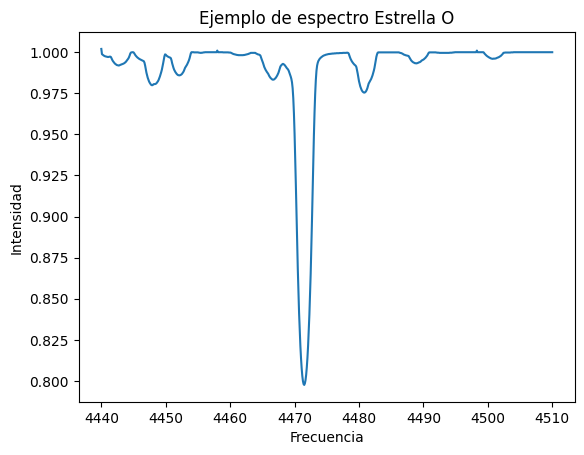

In [59]:
import matplotlib.pyplot as plt
target = ['temperature','g','v']
x = df.drop(target,axis = 1)
plt.plot(x.columns.map(float),x.iloc[0])
plt.title('Ejemplo de espectro Estrella O')
plt.xlabel('Frecuencia')
plt.ylabel('Intensidad')

# 3. B Spectra

In [13]:
OdataPath = './Data/BRSpectra'
os.chdir(path)
os.chdir(OdataPath)
spectraList = os.listdir()

In [14]:
model0 = 'BG15000g175v2_R3.7'
f = open(model0)
data = f.readlines()
frequencies = {}
for row in data:
   frequencies[row.split()[0]] = [] 

In [15]:
# formato: G27500g300v10_R3.7
import re
pattern = r'^BG([0-9]+)g([0-9]+)[a-zA-Z0-9_]+_R([0-9]+).7'
cmp = re.compile(pattern)

temperature = []
g = []
v = []

intensities = frequencies

for modelName in spectraList:
	values = cmp.split(modelName)
	del values[0]; del values[-1]
 
	temperature.append(float(values[0]))
	g.append(float(values[1])/100)
	v.append(float(values[2]))
	
	f = open(modelName)
	data = f.readlines()

	for row in data:
		freq, intensity = row.split() 
		intensities[freq].append(float(intensity))

In [16]:
intensities['temperature'] = temperature
intensities['g'] = g
intensities['v'] = v

In [17]:
import pandas as pd
df = pd.DataFrame(intensities)
df.to_csv(path+'/Data/b_spectral_lines.csv',index=False)
df.head()

,4440.000,4440.100,4440.200,4440.300,4440.400,4440.500,4440.600,4440.700,4440.800,4440.900,...,4509.400,4509.500,4509.600,4509.700,4509.800,4509.900,4510.000,temperature,g,v
0,0.9995,0.9997,0.9998,0.9998,0.9998,0.9996,0.9991,0.9987,0.9984,0.9981,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,102.0
1,0.9995,0.9997,0.9998,0.9998,0.9997,0.9994,0.9990,0.9986,0.9983,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,105.0
2,0.9995,0.9997,0.9998,0.9998,0.9997,0.9992,0.9988,0.9985,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,108.0
3,0.9995,0.9997,0.9998,0.9997,0.9995,0.9991,0.9987,0.9984,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,111.0
4,0.9995,0.9997,0.9998,0.9997,0.9993,0.9989,0.9986,0.9984,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,114.0


Text(0, 0.5, 'Intensidad')

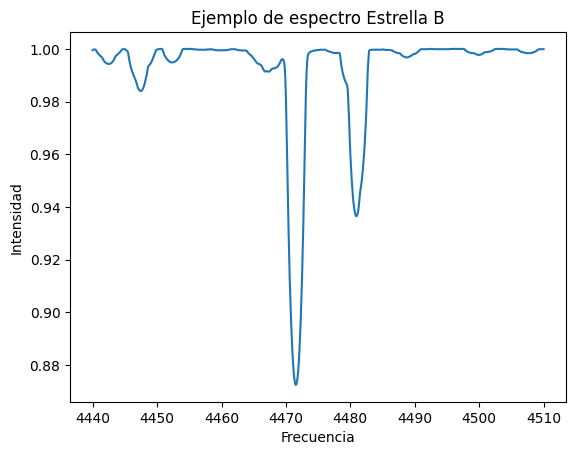

In [18]:
import matplotlib.pyplot as plt
target = ['temperature','g','v']
x = df.drop(target,axis = 1)
plt.plot(x.columns.map(float),x.iloc[0])
plt.title('Ejemplo de espectro Estrella B')
plt.xlabel('Frecuencia')
plt.ylabel('Intensidad')

# 4. Real Spectra

In [8]:
RdataPath = './Data/RealSpectra'
os.chdir(path)
os.chdir(RdataPath)
spectraList = os.listdir()

NUM_STARS = len(spectraList)

In [9]:
# formato: points amount: 701
import math
import re
pattern = r'^(?:HD|hd)([0-9]+)_([0-9]+-[0-9]+-[0-9]+)_([0-9]+-[0-9]+-[0-9]+)_final_corr.txt'
cmp = re.compile(pattern)

num_points = 701
freq_lower_limit=4440.0
freq_upper_limit=4510.0

starNames = []
date = []
time = []

intensities = []
frequencies = []

parameters = pd.read_csv(path+'/Data/RealSpectra/parameters.csv').dropna()

for fileName in spectraList:
	values = cmp.split(fileName)
	if len(values)>1:
		del values[0]; del values[-1]

		if int(values[0]) in parameters.HD.values:
			starNames.append(values[0])
			date.append(values[1])
			time.append(values[2])

			f = open(fileName)
			data = f.readlines()

			fList = []
			iList = []
			for i, row in enumerate(data):
				freq, intensity = row.split()
				if float(freq) >= freq_lower_limit and float(freq) <= freq_upper_limit:
					fList.append(float(freq))
					iList.append(float(intensity))

			diff = abs(num_points-len(iList))
			f = len(iList)/diff
			for i in range(diff-1,-1,-1):
				fList.pop(math.floor(i*f))
				iList.pop(math.floor(i*f))

			intensities.append(iList)
			frequencies.append(fList)

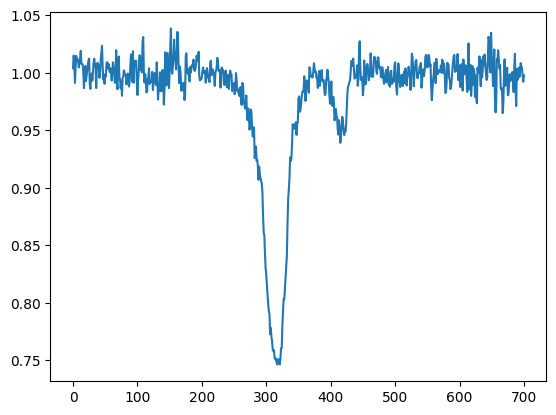

In [10]:
import matplotlib.pyplot as plt
plt.plot(intensities[20])

In [11]:
intensities_dict = {}

t = []
g = []
v = []

for star in starNames:
	if int(star) in parameters.HD.unique():
		t.append(parameters[parameters.HD==int(star)].temperature.values[0])
		g.append(parameters[parameters.HD==int(star)].g.values[0])
		v.append(parameters[parameters.HD==int(star)].v.values[0])

intensities = np.array(intensities).T
for i in range(num_points):
	intensities_dict[i] = intensities[i]
 
intensities_dict['HD'] = starNames
intensities_dict['date'] = date
intensities_dict['time'] = time

intensities_dict['temperature'] = t
intensities_dict['g'] = g
intensities_dict['v'] = v

In [12]:
import pandas as pd
df = pd.DataFrame(intensities_dict)
df.to_csv(path+'/Data/observed_spectral_lines_v3.csv',index=False)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,697,698,699,700,HD,date,time,temperature,g,v
0,1.010598,1.004843,0.984861,0.989841,0.997078,0.993211,1.006566,1.016346,1.010381,1.010483,...,0.995945,1.007343,1.007490,0.999006,102776,2014-01-30,05-09-05,20000,3.2,200.0
1,0.996966,0.934700,0.977159,1.033947,1.035052,1.053158,1.070540,1.060786,1.040563,1.096689,...,1.025803,0.989811,1.010237,1.020176,102776,2014-03-19,07-07-14,20000,3.2,200.0
2,1.008989,0.989801,1.000990,1.002366,1.023047,1.023753,1.001300,0.996804,1.020151,1.003642,...,1.006645,1.004032,1.009982,0.996814,102776,2015-02-27,07-12-10,20000,3.2,200.0
